# K-Nearest Neighbours

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hmatalonga/data-science-bits/blob/master/notebooks/knn.ipynb)

KNN algorithm implementation from scratch.

**Acknowledgements:** This code was originally inspired by [MLfromscratch](https://github.com/python-engineer/MLfromscratch) repository.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Set seed for reproducibility
SEED = 42
np.random.seed(42)

In [3]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

class KNN:

  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

    return self

  def predict(self, X):
    return np.array([self._predict(x) for x in X])

  def _predict(self, x):
    # 1. Compute distances between x and all examples in the training set
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
    # 2. Sort by distance and return indices of the first k neighbors
    k_idx = np.argsort(distances)[:self.k]
    
    # 3. Extract the labels of the k nearest neighbor training samples
    labels = self.y_train[k_idx]  
    
    # 4. Return the most common class label
    most_common = Counter(labels).most_common(1)

    return most_common[0][0]

In [4]:
data = sns.load_dataset('penguins').dropna()

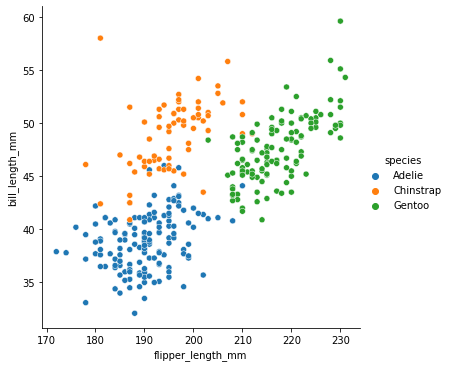

In [5]:
sns.relplot(x='flipper_length_mm', y='bill_length_mm', hue='species', data=data)

In [6]:
data = pd.get_dummies(data, columns=['island', 'sex'])
data['species'] = LabelEncoder().fit_transform(data['species'])

data.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,0,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,0,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,0,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,0,39.3,20.6,190.0,3650.0,0,0,1,0,1


In [7]:
y = data['species'].to_numpy()
X = data.drop('species', axis=1).to_numpy()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [9]:
clf = KNN(k=3).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Accuracy: 0.806


In [10]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

y_pred = sklearn_knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Accuracy: 0.806
